# Dimensionality reduction : PCA & NMF on ST data

Before the realization of an autoencoder, we tried to reduct the data with PCA and NMF.

The aim is to reduce data to ~10 dimensions in order to merged they with morphological features.

As the results highlight a percentage of explained variance very low, we choose to perform autoencoder.

We tested the algorithms on 151673 sample from DLPFC dataset

# 1. Import packages and data

pip install scanpy

pip install opencv-python

In [35]:
from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.decomposition import PCA #for pca
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# for ST data
import scanpy as sc
import cv2
# for kmeans clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# nmf
from sklearn.decomposition import NMF
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics
# for ARI
from sklearn import metrics

Import  data :

In [3]:
counts = pd.read_csv("dataframe/DPLFC_151673_counts_with_probes.csv")
counts = counts.rename(columns={"Unnamed: 0": "probes"})
counts

,probes,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,...,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C,y_coord,x_coord
0,AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8468,9791
1,AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2807,5769
2,AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9505,4068
3,AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4151,9271
4,AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7583,3393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9396,5653
3635,TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9630,4825
3636,TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7831,4631
3637,TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11193,5571


In [4]:
counts_wo_coords = counts.drop(["x_coord", "y_coord"], axis = 1)

In [5]:
counts_wo_coords = counts_wo_coords.set_index("probes")
counts_wo_coords.head()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
probes,,,,,,,,,,,,,,,,,,,,,
AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import image : 

In [6]:
img = cv2.imread(f'visium/151673/spatial/151673.tif')

Import visium data :

In [29]:
ST_visium = sc.read_visium("./visium/151673/")

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


# 2. Functions definition

In [71]:
def perform_pca(counts, nb_components):
    """Perform PCA to X dimensions

    Parameters
    ----------
    counts : pandas dataframe
        Counts dataframe
    nb_components : int
        Number of components to keep
        
    Returns
    -------
    features : pandas index
        counts columns
    std_counts : pandas dataframe
        standardize counts
    pca : sklearn pca
        pca
    principalComponents : numpy array
        array of components
    """
    features = counts.columns
    #Standardize
    std_counts = StandardScaler().fit_transform(counts)
    #pca
    pca = PCA(n_components=nb_components)
    principalComponents = pca.fit_transform(std_counts)
    return (features, std_counts, pca, principalComponents)

In [73]:
def perform_kmeans(counts, pca_counts, img):
    """Perform kmans and plot results on image

    Parameters
    ----------
    counts : pandas dataframe
        Counts dataframe
    pca_counts : pandas dataframe
        dataframe of pca components
    img : array of image
        image where result is plot
        
    Returns
    -------
    pca_counts_transformed : pandas dataframe
        dataframe of standardize pca components
    kmeans : sklearn kmeans
        kmeans results
    """
    x = list(counts['x_coord'])
    y = list(counts['y_coord'])
    #standardize
    mms = StandardScaler()
    mms.fit(pca_counts)
    pca_counts_transformed = mms.transform(pca_counts)
    #kmeans
    kmeans = KMeans(n_clusters=7).fit(pca_counts_transformed)
    # centroids
    centroids = kmeans.cluster_centers_
    #plt
    plt.imshow(img)
    plt.scatter(x,y, s = 1, c=kmeans.labels_.astype(float))
    return(pca_counts_transformed, kmeans)



In [80]:
def get_score_nmf(model, data, scorer=metrics.explained_variance_score):
    """Estimate performance of the model on the data

    Parameters
    ----------
    model : sklearn nmf decomposition
        nmf
    data : numpy array
        input data sclarer transformed
    scorer : metrics
        Explained variance score
        
    Returns
    -------
    data : numpy array
         input data sclarer transformed
    prediction : float
        prediction value
    """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

# 3. Principal component analysis (PCA)

## 3.1 Projection to 10 dimensions

In [11]:
features, std_counts, pca, principalComponents = perform_pca(counts_wo_coords, 10)

In [12]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4',
                          'principal component 5','principal component 6',
                          'principal component 7','principal component 8',
                          'principal component 9','principal component 10'])

In [13]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,45.341592,0.187323,5.834267,-9.934877,2.696871,5.668269,2.512289,-1.824685,0.404314,3.054727
1,-30.582179,-6.787419,0.401137,1.110419,-0.442256,1.555048,0.753882,1.089132,-1.759655,-0.528395
2,-15.545752,33.633481,-1.103012,0.653114,-4.021477,0.195977,-0.276684,-0.462932,-1.279539,-0.326753
3,4.594759,-2.264015,6.117641,-5.582146,0.441070,4.664687,-0.283517,0.114490,-1.240964,0.311545
4,-2.457807,-0.945425,0.913274,2.247841,1.545655,-1.043605,-2.036977,-0.839431,1.798921,-2.285248
...,...,...,...,...,...,...,...,...,...,...
3634,-9.758980,48.593664,-4.045972,3.675143,-5.944850,-1.813959,1.230634,0.181724,-3.039621,-0.079082
3635,-24.127971,17.013598,1.656824,-1.528691,0.308880,2.519423,0.067557,-0.786679,-1.636708,1.617582
3636,-27.281272,-1.104438,0.607081,2.173728,-1.068548,-0.372353,0.794313,0.619937,-0.178722,-0.921807
3637,-26.278018,5.356577,0.036491,0.776647,0.524025,-0.681180,0.921685,0.346365,-0.547054,-0.430739


### Kmeans clustering

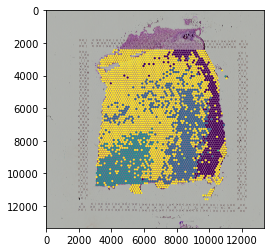

In [26]:
pca_counts_transformed_df, kmeans = perform_kmeans(counts, principalDf, img)

In [25]:
counts_cluster = counts.copy()
counts_cluster['cluster']=kmeans.labels_.astype(int)
counts_cluster

,probes,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,...,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C,y_coord,x_coord,cluster
0,AAACAAGTATCTCCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8468,9791,1
1,AAACAATCTACTAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2807,5769,0
2,AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9505,4068,2
3,AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4151,9271,0
4,AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7583,3393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,TTGTTTCACATCCAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9396,5653,2
3635,TTGTTTCATTAGTCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9630,4825,2
3636,TTGTTTCCATACAACT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7831,4631,0
3637,TTGTTTGTATTACACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11193,5571,0


### Calcule ARI score

In [30]:
counts_cluster = counts_cluster[["probes","cluster"]].copy()
counts_cluster = counts_cluster.set_index('probes')
ST_visium.obs['domain'] = counts_cluster
ST_visium.obs['domain']

AAACAAGTATCTCCCA-1    1
AAACAATCTACTAGCA-1    0
AAACACCAATAACTGC-1    2
AAACAGAGCGACTCCT-1    0
AAACAGCTTTCAGAAG-1    0
                     ..
TTGTTTCACATCCAGG-1    2
TTGTTTCATTAGTCTA-1    2
TTGTTTCCATACAACT-1    0
TTGTTTGTATTACACG-1    0
TTGTTTGTGTAAATTC-1    1
Name: domain, Length: 3639, dtype: int64

In [31]:
file_fold = "metadata_DPLFC"
dataset = '151673'

In [33]:
# add ground_truth
df_meta = pd.read_csv(file_fold + '/metadata_151673.tsv', sep='\t')
df_meta_layer = df_meta['layer_guess']
ST_visium.obs['ground_truth'] = df_meta_layer.values

In [34]:
ST_visium = ST_visium[~pd.isnull(ST_visium.obs['ground_truth'])]
ST_visium = ST_visium[~pd.isnull(ST_visium.obs['domain'])]

In [36]:
ARI = metrics.adjusted_rand_score(ST_visium.obs['domain'], ST_visium.obs['ground_truth'])
ST_visium.uns['ARI'] = ARI

print('Dataset:', dataset)
print('ARI:', ARI)

Dataset: 151673
ARI: 0.10942843971162979


/tmp/ipykernel_77/2999003778.py:2: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  ST_visium.uns['ARI'] = ARI
/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


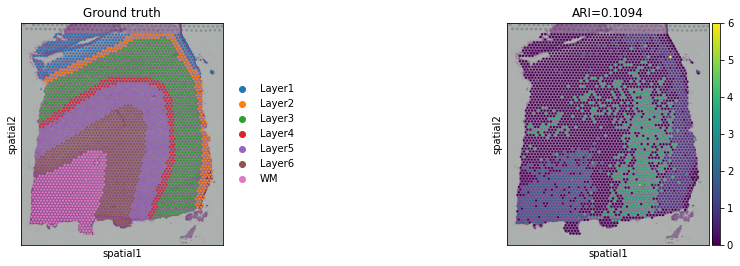

In [37]:
# plotting spatial clustering result
sc.pl.spatial(ST_visium,
              img_key="hires",
              color=["ground_truth", "domain"],
              title=["Ground truth", "ARI=%.4f"%ARI],
              show=True)

## 3.2. PCA projection to 95 percent of the variance

In [38]:
pca_95 = PCA(.95)

In [42]:
principalComponents_95 = pca_95.fit_transform(std_counts)

In [43]:
principalDf_95 = pd.DataFrame(data = principalComponents_95)

In [44]:
principalDf_95

,0,1,2,3,4,5,6,7,8,9,...,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991
0,45.341592,0.187325,5.823240,-10.306580,2.994492,8.104262,1.887597,-3.894750,-1.643979,-3.723334,...,-0.135181,0.204350,0.237370,-0.107198,-0.541442,0.312699,-0.092354,-0.006643,-0.278312,0.042673
1,-30.582179,-6.787419,0.399361,0.975727,-0.497314,1.736801,0.907021,-0.844354,1.441322,-1.095226,...,3.176905,-0.097870,2.405526,-0.479745,0.760333,3.174489,0.198693,0.757409,-1.340128,-3.001230
2,-15.545752,33.633481,-1.102896,0.704667,-3.793414,-0.592406,-0.214602,-0.756991,0.922812,-1.052661,...,-0.178770,-0.708326,-0.951134,1.035500,1.366239,-0.500967,-0.475407,-0.318002,-2.372715,-1.627263
3,4.594759,-2.264015,6.111994,-5.626213,0.209846,3.990933,0.395024,2.719808,2.482097,-1.509441,...,-0.777381,0.195249,-0.054568,0.727341,-0.151650,0.418283,0.205855,-0.184106,-0.653084,0.251106
4,-2.457807,-0.945423,0.901387,2.847994,1.597899,-1.038812,-0.870010,1.249816,0.426705,-1.162351,...,0.558928,1.420520,0.532080,-0.323915,0.402215,-0.145596,-1.114446,0.660597,0.617260,0.593518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,-9.758980,48.593664,-4.043332,3.585377,-5.904817,-1.571458,1.496363,-2.606980,1.724539,-2.072831,...,0.405541,0.406873,0.303585,2.134965,1.033090,0.442773,0.392777,-0.375586,-1.289176,-0.026384
3635,-24.127971,17.013598,1.662089,-1.444254,0.121927,3.055705,0.476421,-2.181043,0.452774,-0.893104,...,-1.946775,2.306529,5.018749,-3.573505,1.775368,0.126585,-3.588047,-3.988153,-0.388368,-0.226138
3636,-27.281272,-1.104438,0.600973,2.214505,-0.954169,-0.369442,0.480326,0.111472,0.800645,-0.139768,...,-1.017581,-0.474467,-0.652850,-0.752326,3.520962,-2.846339,1.255918,2.207340,-1.759587,-0.429193
3637,-26.278018,5.356577,0.042056,0.994091,0.334337,-0.536175,0.714957,0.014344,0.235022,0.479048,...,1.912150,-0.133851,-1.272586,-3.373673,-0.425174,0.047003,0.836646,-1.009379,-0.543134,-0.328073


## 3.3. Explained variance

In [45]:
pca.explained_variance_ratio_

array([0.0351653 , 0.00609008, 0.00179004, 0.00116585, 0.00109329,
       0.00102879, 0.00099514, 0.00093655, 0.00092739, 0.00091719])

In [46]:
pca_95.explained_variance_ratio_

array([0.0351653 , 0.00609008, 0.00179007, ..., 0.00010918, 0.00010911,
       0.00010909])

In [47]:
pca_95.n_components_

2992

In [48]:
for variance in np.arange(.1, 1, .05):
    pca = PCA(variance)
    principalComponents = pca.fit_transform(std_counts)
    print(f'For {variance} percent of the variance retained, the number of principal component to keep is :{pca.n_components_}') 

For 0.1 percent of the variance retained, the number of principal component to keep is :75
For 0.15000000000000002 percent of the variance retained, the number of principal component to keep is :150
For 0.20000000000000004 percent of the variance retained, the number of principal component to keep is :234
For 0.25000000000000006 percent of the variance retained, the number of principal component to keep is :326
For 0.30000000000000004 percent of the variance retained, the number of principal component to keep is :425
For 0.3500000000000001 percent of the variance retained, the number of principal component to keep is :533
For 0.40000000000000013 percent of the variance retained, the number of principal component to keep is :648
For 0.45000000000000007 percent of the variance retained, the number of principal component to keep is :773
For 0.5000000000000001 percent of the variance retained, the number of principal component to keep is :907
For 0.5500000000000002 percent of the variance 

# 4. Non-negative matrix factorization (NMF)

## 4.1 Preprocessing

In [53]:
scaler = preprocessing.StandardScaler(with_mean=False).fit(counts_wo_coords)

In [55]:
scaler_transform = scaler.transform(counts_wo_coords)

## 4.2. 10 components

In [82]:
nmf = decomposition.NMF(n_components=10).fit(scaler_transform)
perfs = get_score_nmf(nmf, scaler_transform)
print(f"component = 9, total variance explain ={perfs}")

/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/opt/conda/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


component = 9, total variance explain =0.3810348436661495
